In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:

file_path = "D:\Desktop\Sem 3\ANLP\TextAnalysis\Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0])
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1])
cc_df = pd.read_excel(file_path, sheet_name=sheets[4])
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2])
st_df = pd.read_excel(file_path, sheet_name=sheets[5])
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3])
tt_df = pd.read_excel(file_path, sheet_name=sheets[6])


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\2545082455.py:1: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Desktop\Sem 3\ANLP\TextAnalysis\Australian Skills Classification - December 2023.xlsx"


In [3]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
]

for name, df in df_list:
    print(f"{name} columns: {df.columns.tolist()}")


occupation_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
cc_desc_df columns: ['Core Competency', 'Core Competency Description', 'Score', 'Proficiency Level', 'Anchor Value']
cc_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level', 'Anchor Value']
st_hier_df columns: ['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
st_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Specialist Task', '% of time spent on task', 'Emerging/\nTrending Flag', 'Specialist Cluster', ' % of time spent on cluster', 'Cluster Family', '% of time spent on family', 'Skills Statement']
tt_hier_df columns: ['Technology Tool Category', 'Technology Tool Category Description', 'Technology Tool', 'Technology Tool Description', 'Technology Tool Extended Description']
tt_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Pro

### Occupation Df

In [4]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [5]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation'
 'NEC Category']


In [6]:
print("There are",occupation_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 1178 different occupations listed


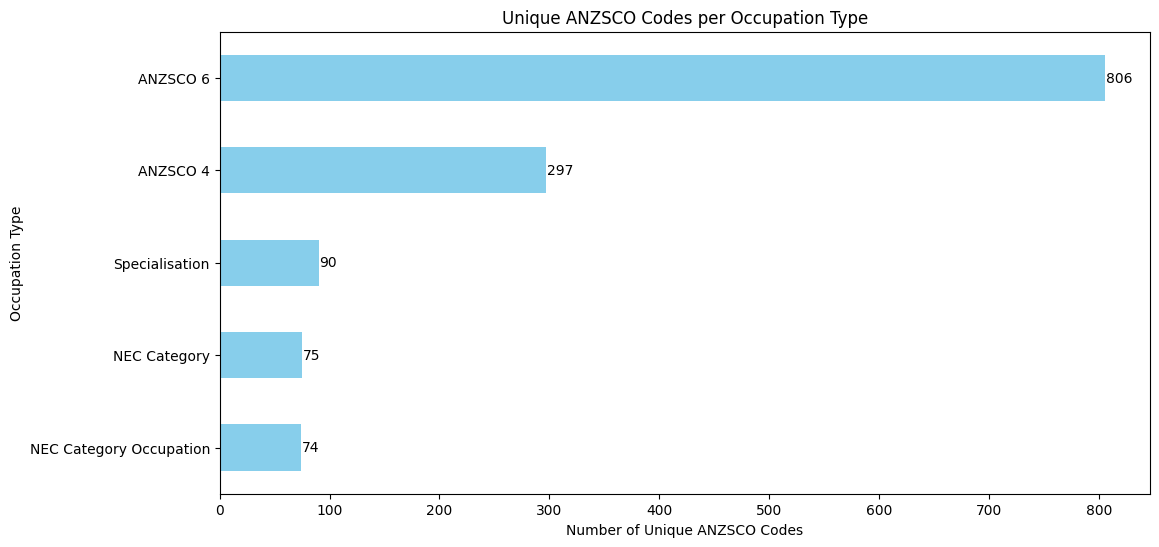

In [7]:
import matplotlib.pyplot as plt

# Count unique ANZSCO Codes per Occupation Type
occupation_counts = occupation_df.groupby('Occupation Type')['ANZSCO Code'].nunique()

# Sort values for better visualization
occupation_counts = occupation_counts.sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
ax = occupation_counts.plot(kind='barh', color='skyblue')

# Add value labels at the end of each bar
for index, value in enumerate(occupation_counts):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10)

plt.xlabel("Number of Unique ANZSCO Codes")
plt.ylabel("Occupation Type")
plt.title("Unique ANZSCO Codes per Occupation Type")
plt.show()


### Core Competency

In [8]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [12]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


In [13]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [14]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


In [17]:
cc_counts = cc_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


### ST

In [22]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


In [23]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [25]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1177 different occupations listed


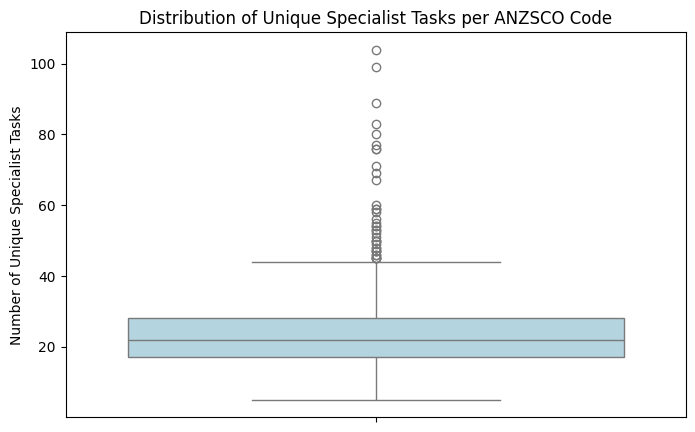

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby("ANZSCO Code")["Specialist Task"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")

# Show plot
plt.show()


In [28]:
# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = st_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              Systems Administrator   
1       313113                                  Web Administrator   
2       249212                    Dance Teacher (Private Tuition)   
3         2412                            Primary School Teachers   
4       241213                             Primary School Teacher   
5       263111              Computer Network and Systems Engineer   
6       322313                               Welder (First Class)   
7         2413  Middle School Teachers / Intermediate School T...   
8       241311  Middle School Teacher / Intermediate School Te...   
9       262111                             Database Administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


In [29]:
import numpy as np

# Get counts of unique specialist tasks per ANZSCO Code
st_counts = st_df.groupby("ANZSCO Code")["Specialist Task"].nunique()

# Calculate IQR (Interquartile Range) to detect outliers
Q1 = np.percentile(st_counts, 25)  # First quartile (25th percentile)
Q3 = np.percentile(st_counts, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outliers as values greater than Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR
outliers = st_counts[st_counts > outlier_threshold].reset_index()

# Merge with ANZSCO Title to show meaningful names
top_outliers = outliers.merge(st_df[["ANZSCO Code", "ANZSCO Title"]].drop_duplicates(), on="ANZSCO Code")

# Sort by number of specialist tasks and display top 10
top_outliers = top_outliers.sort_values(by="Specialist Task", ascending=False).head(10)
print(top_outliers)


     ANZSCO Code  Specialist Task  \
52        233999              104   
53        233999              104   
54        233999              104   
50        233999              104   
57        233999              104   
56        233999              104   
55        233999              104   
51        233999              104   
148       399999               99   
145       399999               99   

                                          ANZSCO Title  
52                                  Corrosion Engineer  
53                                Fire Safety Engineer  
54                               Mechatronics Engineer  
50                                   Acoustic Engineer  
57   Test and Activation Engineer (Naval Shipbuilding)  
56                                     Safety Engineer  
55                             Product Design Engineer  
51                                Calibration Engineer  
148                                     Ski Technician  
145                   

### TT

In [32]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [30]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())
#print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


In [33]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [34]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1042 different occupations listed


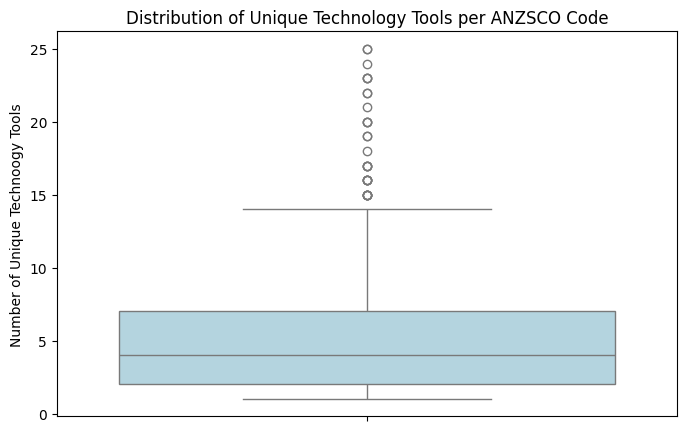

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby("ANZSCO Code")["Technology Tool"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")

# Show plot
plt.show()


In [39]:
# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = tt_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             Database Administrator   
1         2611                  ICT Business and Systems Analysts   
2       262113                              Systems Administrator   
3       263111              Computer Network and Systems Engineer   
4       263212                               ICT Support Engineer   
5         2621  Database and Systems Administrators, and ICT S...   
6       135199                                    Network Manager   
7       261111                               ICT Business Analyst   
8       263112                              Network Administrator   
9       261313                                  Software Engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


In [41]:
import numpy as np

# Get counts of unique specialist tasks per ANZSCO Code
tt_counts = tt_df.groupby("ANZSCO Code")["Technology Tool"].nunique()

# Calculate IQR (Interquartile Range) to detect outliers
Q1 = np.percentile(tt_counts, 25)  # First quartile (25th percentile)
Q3 = np.percentile(tt_counts, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outliers as values greater than Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR
outliers = tt_counts[tt_counts > outlier_threshold].reset_index()

# Merge with ANZSCO Title to show meaningful names
top_outliers = outliers.merge(tt_df[["ANZSCO Code", "ANZSCO Title"]].drop_duplicates(), on="ANZSCO Code")

# Sort by number of specialist tasks and display top 10
top_outliers = top_outliers.sort_values(by="Technology Tool", ascending=False).head(10)
print(top_outliers)


    ANZSCO Code  Technology Tool  \
24       233999               25   
25       233999               25   
26       233999               25   
23       233999               25   
28       233999               25   
29       233999               25   
30       233999               25   
27       233999               25   
42       262111               25   
2          2611               24   

                                         ANZSCO Title  
24                               Calibration Engineer  
25                                 Corrosion Engineer  
26                               Fire Safety Engineer  
23                                  Acoustic Engineer  
28                            Product Design Engineer  
29                                    Safety Engineer  
30  Test and Activation Engineer (Naval Shipbuilding)  
27                              Mechatronics Engineer  
42                             Database Administrator  
2                   ICT Business and System